In [58]:
import pyaudio
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [59]:
p = pyaudio.PyAudio() # instantiate PyAudio
chunck = 1024 # number of samples per frame

In [60]:
# open stream
stream = p.open(format=pyaudio.paInt16,channels=1, rate=10000, input=True, frames_per_buffer=chunck)

In [61]:
data2 = np.array([]) # to store the data
for i in range(1,50):
    a = stream.read(chunck) # read a chunck of data
    data = np.fromstring(a, dtype=np.int16) # convert data to numpy array
    data2 = np.append(data2, data) # append data to data2


#to stop the recording after the amount of time we calculated in our code
stream.stop_stream() # stop stream(Recording)
stream.close() # close stream
p.terminate() # close PyAudio

<ipython-input-61-62c255281272>:4: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  data = np.fromstring(a, dtype=np.int16) # convert data to numpy array


In [62]:
print(data)

[ 4  4  4 ... -1 -1 -2]


In [63]:
print(data2)

[-52. -98. -76. ...  -1.  -1.  -2.]


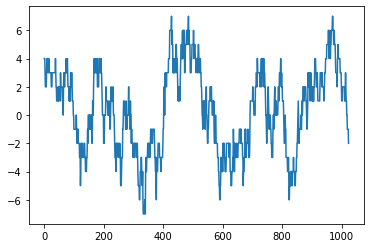

In [64]:
plt.close()
plt.plot(data)
plt.show()

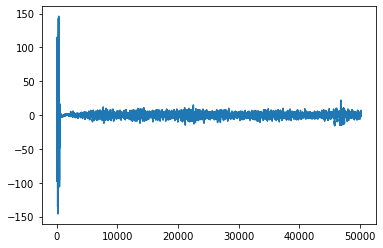

In [65]:
plt.close()
plt.plot(data2)
plt.show()